#   TL (Aprendizaje por tansferencia)

Vamos a aplicar transferencia de aprendizaje utilizando el modelo preentrenado MobileNetV2 para mejorar la CNN que clasifica imágenes de equipos de fútbol.

#### 1. configurar y cargar datos

In [1]:
import tensorflow as tf
import os 

c:\Users\albab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
os.listdir('../../images')

['ac_milan_logo',
 'arsenal_logo',
 'atletico_madrid_logo',
 'barca_logo',
 'bayern_munich_logo',
 'benfica_logo',
 'borrusia_dormunt_logo',
 'braga_logo',
 'celtic_logo',
 'copenhagen_logo',
 'crvena_zvezda_logo',
 'feyenoord_logo',
 'galatasaray_logo',
 'inter_milan_logo',
 'lazio_logo',
 'lens_logo',
 'manchester_city_logo',
 'manchester_united_logo',
 'napoli_logo',
 'newcastle_united_logo',
 'paris_logo',
 'porto_logo',
 'psv_eindhoven_logo',
 'rb_leipzig_logo',
 'real_madrid_logo',
 'real_sociedad_logo',
 'red_bull_salzburg_logo',
 'royal_antwerp_logo',
 'sevilla_logo',
 'shakhtar_donetsk_logo',
 'union_berlin_logo',
 'young _boys_logo']

#### 2. Limpieza imagenes


In [3]:
logo_directory_path = os.path.join('../../images')
logo_files = os.listdir(logo_directory_path)

In [5]:
import os
import imghdr

def prepare_image_dataset(directory_path):
    """
    Prepara el conjunto de datos de imágenes asegurándose de que todos los archivos estén en un formato compatible con TensorFlow.
    Los archivos no imagen y los formatos de imagen no soportados son eliminados del directorio.
    
    Args:
    directory_path (str): Ruta al directorio que contiene los archivos de imagen.
    
    Returns:
    list: Una lista de rutas a archivos de imagen válidos.
    """
    supported_formats = {'jpeg', 'png', 'gif', 'bmp'}  # Formatos de imagen soportados por TensorFlow
    valid_images = []

    # Recorre el directorio y subdirectorios
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Construye la ruta completa al archivo
            file_path = os.path.join(root, file)
            # Verifica el formato de la imagen
            image_format = imghdr.what(file_path)
            if image_format in supported_formats:
                valid_images.append(file_path)
            else:
                # Elimina el archivo no soportado o no imagen
                os.remove(file_path)
                print(f"Archivo no soportado eliminado: {file_path}")

    return valid_images

# Ejemplo de uso
logo_directory_path = '../../images'
valid_image_files = prepare_image_dataset(logo_directory_path)
print(valid_image_files[:10])  # Muestra los primeros 10 archivos de imagen válidos



['../../images\\ac_milan_logo\\-dream-league-soccer-coppa-italia-kit-juventus-f-c-football-emblem-trademark.png', '../../images\\ac_milan_logo\\-fC3BAtbol-inter-milan-en-jersey-comparado-con-antiguo-la-camiseta-229001655.jpg', '../../images\\ac_milan_logo\\01-studiomilan-imagenes-brandemia-blog.jpg', '../../images\\ac_milan_logo\\040ee09fecd29c809e6289af34f73dfa.png', '../../images\\ac_milan_logo\\0b421578eab74f9ea47e36fdc0836279.jpg', '../../images\\ac_milan_logo\\1024px-Escudo_ac_milan_1946.svg.png', '../../images\\ac_milan_logo\\1200px-FC_Internazionale_Milano_2021.svg.png', '../../images\\ac_milan_logo\\2021-internazionale-internacional-futbol-club-nuevo-logo-2021-diseno-2f6hyrw.jpg', '../../images\\ac_milan_logo\\205513_3.jpg', '../../images\\ac_milan_logo\\207645_3.jpg']


#### 3. Cargamos los datos

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data_images = tf.keras.utils.image_dataset_from_directory('../../images')

Found 3408 files belonging to 32 classes.


In [8]:
data_iterator = data_images.as_numpy_iterator() #esto es un iterador

In [9]:
batch = data_iterator.next()

In [10]:
#esto es el tamaño de la imagen
batch[0].shape 

(32, 256, 256, 3)

In [11]:
batch[1] #esto es el label de cada imagen

array([ 2,  5, 31,  7, 24,  8, 12,  6,  2, 25,  8,  7, 21,  9, 16, 15, 31,
        5, 24,  1,  1, 13,  1, 31, 25, 19, 31, 14, 25, 14, 13, 20])

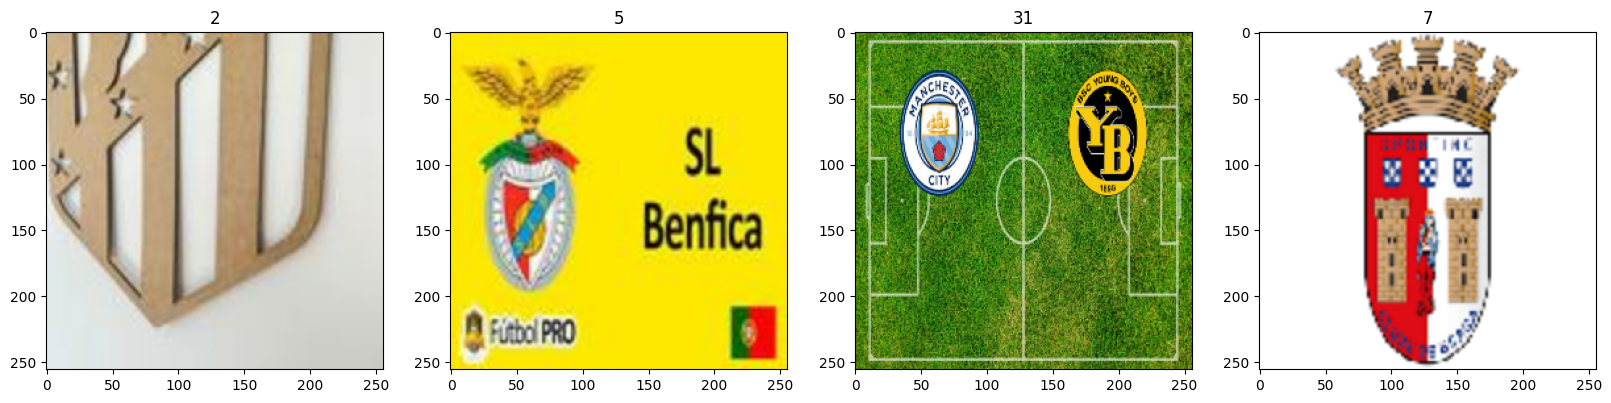

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
#NOS VAMOS A APUNTAR QUE NÚMERO CORRESPONDE A CADA IMAGEN (EQUIPO)
#Class 0: AC Milan
#Class 1: Arsenal
#Class 2: Atletico de Madrid
#Class 3: Barcelona
#Class 4: Bayern Munich
#Class 5: Benfica
#Class 6: Borussia Dortmund
#Class 7: Braga
#Class 8: Celtic
#Class 9: Copenhagen
#Class 10: Crvena zvezda
#Class 11: Feyenoord
#Class 12: Galatasaray
#Class 13: Inter de Milan
#Class 14: Lazio
#Class 15: Lens
#Class 16: Manchester City
#Class 17: Manchester United
#Class 18: Napoli
#Class 19: Newcastle United
#Class 20: Paris
#Class 21: Porto
#Class 22: PSV Eindhoven
#Class 23: Rb Leipzig
#Class 24: Real Madrid
#Class 25: Real Sociedad
#Class 26: Red Bull Salzburg
#Class 27: Royal Antwerp
#Class 28: Sevilla
#Class 29: Shakhtar Donetsk
#Class 30: Union Berlin
#Class 31: Young Boys


In [13]:
# Definimos la ruta a los datos
data_directory = '../../images'

# Configuramos el aumento de datos utilizando la API de preprocesamiento de Keras
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

# Preprocesamos los datos y cargamos usando image_dataset_from_directory
def preprocess(x, y):
    x = data_augmentation(x)
    x = x / 255.0
    return x, y

data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    label_mode='int',
    image_size=(256, 256)
)

data = data.map(preprocess)


Found 3408 files belonging to 32 classes.


#### 4. Dividimos los datos

In [14]:
# Dividimos los datos
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size)

#### 5. Creamos modelo

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Cargar MobileNetV2 preentrenado sin la capa superior
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# Creamos el modelo usando MobileNetV2 como base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='softmax') 
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### 6. Entrenamos el modelo

In [16]:
from tensorflow.keras.callbacks import TensorBoard

# Callback para TensorBoard
log_dir = '../../logs'
tensorboard_callback = TensorBoard(log_dir=log_dir)

# Entrenamos el modelo
history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[tensorboard_callback])


Epoch 1/10


74/74 [==============================] - 57s 730ms/step - loss: 2.9206 - accuracy: 0.2770 - val_loss: 1.8485 - val_accuracy: 0.5179
Epoch 2/10
74/74 [==============================] - 54s 725ms/step - loss: 1.7104 - accuracy: 0.5401 - val_loss: 1.4392 - val_accuracy: 0.6339
Epoch 3/10
74/74 [==============================] - 55s 733ms/step - loss: 1.3697 - accuracy: 0.6161 - val_loss: 1.2330 - val_accuracy: 0.6830
Epoch 4/10
74/74 [==============================] - 54s 729ms/step - loss: 1.1771 - accuracy: 0.6829 - val_loss: 1.1737 - val_accuracy: 0.6920
Epoch 5/10
74/74 [==============================] - 54s 724ms/step - loss: 1.0393 - accuracy: 0.7111 - val_loss: 1.1725 - val_accuracy: 0.6949
Epoch 6/10
74/74 [==============================] - 54s 723ms/step - loss: 0.9752 - accuracy: 0.7331 - val_loss: 1.1616 - val_accuracy: 0.7083
Epoch 7/10
74/74 [==============================] - 54s 722ms/step - loss: 0.8996 - accuracy: 0.7475 - val_loss: 1.0674 - val_accuracy: 0.71

#### 7. Visualizacion 

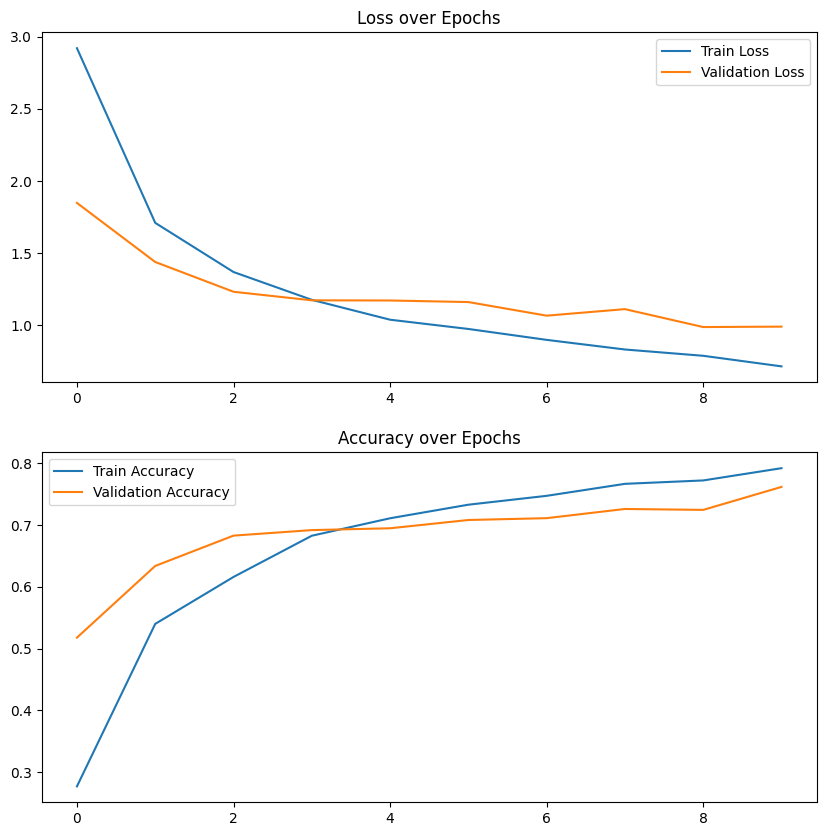

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].legend()

plt.show()

#### 8. Evaluamos el modelo

In [18]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

# Inicializamos las métricas
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

# Iteramos sobre el conjunto de prueba
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat_labels = tf.argmax(yhat, axis=1)
    
    # Actualizamos las métricas. Asegúrate de que las dimensiones y el formato son correctos.
    # Convertimos las etiquetas reales y las predicciones a one-hot si es necesario.
    precision.update_state(tf.one_hot(y, depth=32), tf.one_hot(yhat_labels, depth=32))
    recall.update_state(tf.one_hot(y, depth=32), tf.one_hot(yhat_labels, depth=32))
    accuracy.update_state(tf.one_hot(y, depth=32), tf.one_hot(yhat_labels, depth=32))

# Imprimimos los resultados de las métricas
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')
print(f'Accuracy: {accuracy.result().numpy()}')


1/1 [==============================] - 1s 670ms/step
Precision: 0.72826087474823
Recall: 0.72826087474823
Accuracy: 0.72826087474823


#### 9. Prueba

Imágenes disponibles en la carpeta imagenes_prueba:
1. imagen_prueba.jpeg
2. leipzig_prueba.jpg
3. real_madrid_prueba.png


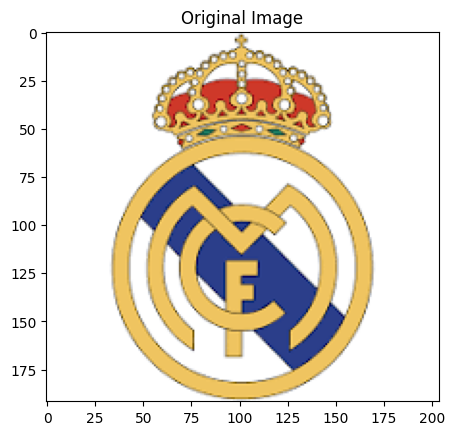

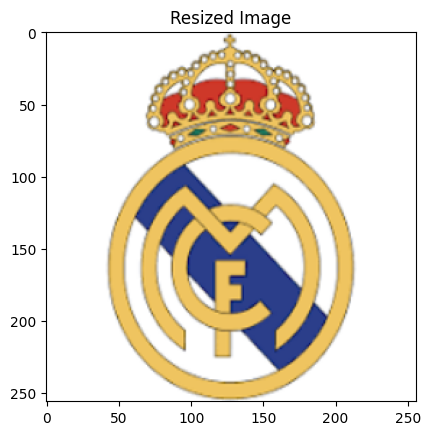

1/1 [==============================] - 0s 89ms/step
Predicted class is Real Madrid with a probability of 0.98


In [20]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Función para mostrar las opciones disponibles en la carpeta imagenes_prueba
def mostrar_opciones_imagenes():
    ruta_carpeta = '../../imagenes_prueba'
    imagenes_disponibles = os.listdir(ruta_carpeta)

    print("Imágenes disponibles en la carpeta imagenes_prueba:")
    for i, imagen in enumerate(imagenes_disponibles, start=1):
        print(f"{i}. {imagen}")

    return imagenes_disponibles

# Solicitar al usuario que seleccione una imagen
def seleccionar_imagen(imagenes_disponibles):
    opcion_imagen = input("Seleccione el número de la imagen que desea analizar: ")

    if opcion_imagen.isdigit() and 1 <= int(opcion_imagen) <= len(imagenes_disponibles):
        nombre_imagen = imagenes_disponibles[int(opcion_imagen) - 1]
        ruta_imagen = os.path.join('../../imagenes_prueba', nombre_imagen)
        return ruta_imagen
    else:
        print("Opción inválida.")
        return None

# Mostrar opciones disponibles y seleccionar imagen
imagenes_disponibles = mostrar_opciones_imagenes()
ruta_imagen = seleccionar_imagen(imagenes_disponibles)

# Si se seleccionó una imagen válida, continuar con el análisis
if ruta_imagen:
    # Cargar la imagen usando OpenCV
    img = cv2.imread(ruta_imagen)

    # Verificar si la imagen fue cargada correctamente
    if img is None:
        print("Error: La imagen no se pudo cargar. Verifica la ruta y el nombre del archivo.")
    else:
        # OpenCV carga la imagen en BGR, la convertimos a RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen original
        plt.imshow(img)
        plt.title('Original Image')
        plt.show()

        # Redimensionar la imagen para que coincida con el tamaño de entrada del modelo
        resize = tf.image.resize(img, (256, 256))

        # Mostrar la imagen redimensionada
        plt.imshow(resize.numpy().astype(int))
        plt.title('Resized Image')
        plt.show()

        # Preparar la imagen para la predicción (añadir una dimensión de batch y normalizar)
        img_array = np.expand_dims(resize / 255, axis=0)

        # Realizar la predicción usando el modelo
        yhat = model.predict(img_array)

        # Lista de nombres de equipos según las clases
        class_names = [
            "AC Milan", "Arsenal", "Atletico de Madrid", "Barcelona", "Bayern Munich",
            "Benfica", "Borussia Dortmund", "Braga", "Celtic", "Copenhagen",
            "Crvena zvezda", "Feyenoord", "Galatasaray", "Inter de Milan", "Lazio",
            "Lens", "Manchester City", "Manchester United", "Napoli", "Newcastle United",
            "Paris", "Porto", "PSV Eindhoven", "Rb Leipzig", "Real Madrid",
            "Real Sociedad", "Red Bull Salzburg", "Royal Antwerp", "Sevilla",
            "Shakhtar Donetsk", "Union Berlin", "Young Boys"
        ]

        # Obtener el índice de la clase con la probabilidad más alta
        predicted_class_index = np.argmax(yhat[0])
        predicted_class_name = class_names[predicted_class_index]
        predicted_probability = np.max(yhat[0])

        # Imprimir la clase predicha y la probabilidad
        print(f'Predicted class is {predicted_class_name} with a probability of {predicted_probability:.2f}')


#### 10. Guardamos el modelo

In [21]:
from tensorflow.keras.models import load_model
# Guardar el modelo
model.save("modelo_cnn_con_transferencia.h5")

# Cargar el modelo
modelo_cargado = load_model("modelo_cnn_con_transferencia.h5")


c:\Users\albab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
